
<table>
  <tr>
    <td bgcolor="FFFFFF">
      <img src="https://drive.google.com/uc?export=view&id=1FUSWDRDDflxrUrYBFPKHE50KrelBYO6N" width = "800" >
      </td>
      <td>
      <img  src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/University_of_Sussex_Logo.svg/1024px-University_of_Sussex_Logo.svg.png" width = "300"
      </td>
    </tr>
<table>  

<!---weird that to put it in the middle I have to align it to the right-->

# Dark matter: Searching for the invisible

### What will we do in this notebook?
In this notebook, we will use simulated [ATLAS detector](https://en.wikipedia.org/wiki/ATLAS_experiment) data to search for evidence of [dark matter](https://home.cern/science/physics/dark-matter).
This notebook can stand on its own, but it is part of a series of three. The analysis you will see later was done by the ATLAS experiment group and published in a paper here: https://arxiv.org/pdf/1708.09624.pdf

The ATLAS detector <!--(https://www.cern/resources/video/experiments/overview-atlas) can we insert the video in the document?--> is the largest particle detector in the world, and is integrated with the <!--maybe i should say Large Hadron Collider-->[LHC](https://home.cern/science/accelerators/large-hadron-collider), the largest [particle accelerator](https://en.wikipedia.org/wiki/Particle_accelerator) in the world. These are both part of [CERN](https://home.cern/), [near Geneva in Switzerland](https://maps.app.goo.gl/KBDhJaFiy8rwoQDG8). Dark Matter is the invisible material that appears to make up a [large portion of our universe's mass](https://youtu.be/h2MlS09KJP4).

The LHC accelerates two beams of protons to near lightspeed, and they collide inside the ATLAS detector. [When proton collisions occur inside ATLAS, there is a chance for dark matter to be produced](https://youtu.be/h2MlS09KJP4). This experiment is dedicated to trying to detect this dark matter. If you want to explore more, or you don't fully understand anything, click on the links!

In this notebook there will be quite a few collapsed sections, like the ones just below this. Blue collapsed sections are basic explanations of concepts, to help you understand more difficult sections. Red collapsed sections are more advanced, if you want to explore further or want a challenge. You can click on them to see what they contain, but they shouldn't be essential to this notebook.
<br>
<br>
<details>
<summary><font color="#0000A1">This is what a blue collapsed section looks like</font></summary>
Blue collapsed sections contain basic explanations of concepts. For instance, we know that dark matter exists because without it, gravity wouldn't be strong enough to hold galaxies together. The stars would drift apart as the galaxy spun.
</details> <!--figured a thing out. Great-->
<details>
<summary><font color="#A10000">This is what a red collapsed section looks like</font></summary>
Red collapsed sections contain more advanced explanations. For instance, dark matter is called "dark" because it isn't detectable through normal means, since it only interacts with the weak force and with gravity. The electromagnetic force doesn't affect it, so light of any frequency can't be used to detect it. </details>

<br><font size="3">
This notebook contains sections of code which help us visualise and analyse the simulated data. In order for the code to work, we need to import some specialised modules. To do that, please <b> click the play symbol</b> to the left of the code below. The play symbol runs the code, which will import the modules for us.


In [ ]:
#importing some packages that will get used later on
from IPython.display import HTML, display, Image #used to embed videos using HTML
import ipywidgets as widgets #used to create interactive elements within the notebook
import gspread as gs
from oauth2client.service_account import ServiceAccountCredentials

## 1 - Introduction
Before we begin searching for dark matter, let's have a look at some of the background physics knowledge in the video below.

### 1.1 - Overview of particle physics and the Standard Model

The visible universe is built from leptons and hadrons. Hadrons are composed of quarks, and make up most of the mass we interact with in our day-to-day lives. Leptons (and Quarks) are fundamental particles, meaning that they have no components: the electron is the most common lepton. Hadrons have much more mass
than leptons. Another category is the force-carrying particles, which are very short-lived and, true to their name, carry forces between other particles. These categories are shown on the Standard Model, which contains all the fundamental particles that physicists have discovered so far. Dark matter is not yet understood, and so is not on the Standard Model.

<details>
<summary><font color="#A10000"> How are the types of particles defined? </font><colourred> </summary>
The different types of fundamental particles are defined by the forces that they experience. Hadrons are particles that are influenced by the strong force, of which gluons are the carrier particle. Leptons are particles that are not influenced by the strong force, and have 1/2 "spin" (which doesn't mean that they are actually rotating - click [here](https://youtu.be/pWlk1gLkF2Y) to find out more). Dark matter does not have a clear definition yet, but its definition will likely include the fact that it cannot interact with the electromagnetic force. </details>



In [ ]:
#@title Video: a more in-depth explanation of the Standard Model and its importance to particle physics:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ehHoOYqAT_U" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### 1.2 - The ATLAS detector
The ATLAS detector is a general-purpose particle detector used to detect the particles that explode out of proton collisions, after they're accelerated to ridiculous speeds by the Large Hadron Collider.<br>
<br>
The Large Hadron Collider is a particle accelerator that accelerates particle-beams very close to the speed of light, and smashes them together millions of times per second inside detectors like ATLAS. When these beams collide, a shower of particles is produced. There is so much energy in these collisions that extremely unstable particles, not usually seen on Earth, can be produced. These particles can teach us a lot about how the universe works, so we use sophisticated detectors like [ATLAS](https://atlas.cern/Discover/Detector) below to study them.

<img src="https://drive.google.com/uc?export=view&id=1PSDruPabZjbtq-0rGEVtU2zFjr-hTitj" width = "800" style="width:40%;" align="left">





In [ ]:
#@title <font color="red">QUIZ:</font> Can you guess how tall the ATLAS detector is?
print("Can you guess is how tall is the ATLAS detector in metres? Press the PLAY button below to activate the code so you can play!\n You can use the slider or click on the value to the right of it and type your answer")

def difference(x=10):
      ans = 46.0
      diff = float(x)-ans
      diff_int = abs(diff)//1
      diff_cm = int((abs(diff)%1)*100)
      print("Your answer is "+str(int(diff_int))+"."+str(diff_cm)+"m away")
      if diff_int < 5:
        print("That's pretty much perfect - the real answer is that the ATLAS detector is 46m tall!")
      elif diff_int < 15:
        print("Getting warm!")

layout = widgets.Layout(width='auto', height='auto') #set width and height

widgets.interact(difference, x = widgets.FloatLogSlider(
    value=10,
    base=10,
    min=-1.5, # max exponent of base
    max=2.5, # min exponent of base
    step=0.001, # exponent step
    description='Answer (m)'),)

LogSlider = widgets.FloatLogSlider(
    value=10,
    base=10,
    min=-10, # max exponent of base
    max=10, # min exponent of base
    step=0.01, # exponent step
    description='Your answer:'
)


Can you guess is how tall is the ATLAS detector in metres? Press the PLAY button below to activate the code so you can play!
 You can use the slider or click on the value to the right of it and type your answer


interactive(children=(FloatLogSlider(value=10.0, description='Answer (m)', max=2.5, min=-1.5, step=0.001), Out…

### 1.3 - Dark Matter
We saw earlier that the Standard Model does not include dark matter. So what is dark matter?

Dark matter is a type of matter which light does not interact with, which makes it impossible to see directly. The reason we cannot see dark matter is because it does not interact with the electromagnetic force. [Light is made of electromagnetic waves](https://www.britannica.com/science/light/Light-as-electromagnetic-radiation), but these do not interact with dark matter, so light simply passes through it. This means that regular observation methods, such as any kind of telescope, simply can't detect it. So, if we cannot see dark matter, how do we know it exists? Below is a video by [FERMILab](https://en.wikipedia.org/wiki/Fermilab) explaining this.


In [ ]:
#@title Video: more about dark matter (and dark energy).
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/oPNrcKeqbBM" frameborder="0" allowfullscreen></iframe>')

### 1.4 - ATLAS and dark matter
So, how are we looking for dark matter using ATLAS?
<br>
First, we need to know exactly what kind of dark matter we are looking for, since we don't know exactly what it is. The theoretical dark matter particle we will be looking for in this notebook is called a [WIMP](https://www.britannica.com/science/weakly-interacting-massive-particle): Weakly Interacting Massive Particle. This is a particle that doesn't interact with the electromagnetic force, but is quite massive and slow. This particle fits most theories on dark matter.

There are other possbilities for what dark matter is, but they're less likely, and we won't be looking at them any more in this notebook. Have a look at the advanced collapsed section below if you're curious.

<details> The best candidate we have for dark matter are WIMPs. However, there are other ways to explain it, though they are less likely to be true. One possibility are "primordial black holes", tiny black holes scattered around galaxies and left over from the big bang, which would act similarly to WIMPs. Another are sterile neutrinos - neutrinos which are much slower and have much more mass than normal. There is also the possibility that our theories of how gravity works are wrong, and dark matter doesn't exist at all: this possibility is known as MOND. However, this is generally considered to be very unlikely.

<font size="2.5"> Here's <a href="https://youtu.be/fidzLZQyaJE?list=PLsPUh22kYmNDTlPO5fDNHZElYeS6yrikR">a video </a>which has a lot more advanced information on what exactly WIMPS are; <a href="https://youtu.be/0sTBZ2G4vow?t=3">another one</a> which explains primordial black holes; and <a href= "https://youtu.be/0sTBZ2G4vow">another one</a> which explains MOND.</font>
<summary><font color="#A10000">Further explanation of WIMPs and other possible dark matter candidates</font><summary/>
</details>

<details> When physicists say that something is "massive", they mean that it has a large mass. For physicists, "mass" is the amount of matter that an object is made of, while "weight" is how much that object is experiencing the force of gravity. Weight changes depending on the strength of gravity an object is experiencing, but mass doesn't: if you went to the moon, your weight would become much less, but your mass would stay the same. For this reason, mass is a more useful measurement than weight.
<summary><font color="#0000A1">What does "massive" mean?</font><summary/>
</details>
<br><font size ="3">
Since WIMPs don't interact with electromagnetic radiation, they're invisible to the ATLAS sensors. So how will we detect them and study them at ATLAS?
<br><br>
If dark matter particles are produced by a collision at ATLAS, the ATLAS sensors won't be able to detect them, but we can find the dark matter particles by studying the other particles in the collision. We do this by using the concept of "conservation of momentum". The video below explains this concept.

In [ ]:
#@title Video: an example of conservation of momentum
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/4IYDb6K5UF8" frameborder="0" allowfullscreen></iframe>')

So how does this relate to us finding dark matter? Well, imagine that one of the tennis balls is invisible, and then they collide. You’d still see the other tennis ball bounce off of it, so you know that there is something invisible for it to bounce off. Carefully studying the tennis-ball collision could teach you about the invisible ball - we study the collisions between protons to learn about the invisible dark matter. At ATLAS the collisions are a lot more complicated than these two tennis balls, but the basic principle is exactly the same:

If our particle collisions produce dark matter which is invisible, it will look like the the momentum of the visible particles is wrong - like we've lost some momentum in the collision. A tennis ball has bounced off something invisible. In fact, the dark matter is carrying this "lost momentum". The lost momentum is represented by the green line in the below image.

In physics this concept is known as the "principle of conservation of momentum".

At ATLAS, we only measure transverse momentum - in less technical language, sideways momentum. This means momentum that is perpendicular to the direction of the particle beam. We don't measure momentum that is along the direction of the particle beam, because we don't know exactly what the momentum of our protons were when they collided. Whereas they shouldn't have any sideways momentum, meaning that their transverse momentum is initially equal to zero, and the transverse momentum after the collision will also be zero.

The diagram below shows how this works in practice. Imagine that the blue circle is a cross-section of the ATLAS detector. One beam of protons is moving away from you towards the yellow collision point, and one is coming towards you, from the other side of the screen. The protons collide, and some particles explode outwards, towards the bottom of the detector. But we don't see any particles explode upwards - so there is some missing momentum. We couldn't detect them, but some invisible particles must have exploded upwards towards the top of the detector - these might be dark matter particles!
<details>
You might be wondering where the sideways or transverse momentum comes from, if momentum is always conserved, and the protons have zero sideways momentum before colliding.

<font size="2">The secret is that momentum is a vector quantity - it's calculated relative to a particular direction. If we consider momentum upwards to be positive, then downwards momentum would be negative. And what happens when we add positive and negative numbers? They cancel each other out. So if two protons collide, causing some dark matter to shoot upwards and some other particles to shoot downwards, the total sideways momentum could still be zero - despite the fact that the protons had no upwards or downwards momentum before colliding!

[This video](https://youtu.be/w2zQJ8JMlBA) has a good explanation of the concept. </font>
<summary> <font color = "#0000A1">How do we add up momentum? </font>
</details>
<details>
Protons are much more complicated than they're generally presented as. They're normally presented as three quarks, connected by the strong force. They do always contain these three quarks (which are known as the "valence" quarks), but they also contain a "sea" of other different types of quarks, constantly appearing and disappearing. These other quarks also have momentum, making calculation of the whole proton's momentum very difficult: it's possible to do, but we don't so that the experiment stays relatively simple.  

<font size = "2">If you want a very comprehensive look at the structure of a proton - [here it is.](https://youtu.be/WZfmG_h5Oyg) Warning: this goes a long way above and beyond this notebook. </font>
<summary> <font color = "#A10000">Advanced information on proton momentum</font>
</details>
<br>
<img src="https://cds.cern.ch/record/2665178/files/Fig_2_Fix.png?subformat=icon-1440" width="600" style="width:20%;" align="left">
<br>
<br>
for more information on this figure go to 2.3.2 the DM_300 figure.

In [ ]:
#@title <font color="red">QUIZ:</font> Test your knowledge of conservation of momentum! Press the play button below to start the quiz
print("           After a particular proton collision in ATLAS, one visible particle and one dark matter particle is created.")
print("           ATLAS detects the visible particle shooting off leftwards. Which direction is the dark matter particle going?")
out = widgets.Dropdown(options=[('', 9),('Upwards',0),('Downwards',0),('To the right',1),('To the left',0)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==9:
    print('')
  elif guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n") #
    print("\033[0;30;107m Remember that the total transverse momentum is zero - if the visible particle is moving leftwards, where is the dark matter going to cancel it out?  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

           After a particular proton collision in ATLAS, one visible particle and one dark matter particle is created.
           ATLAS detects the visible particle shooting off leftwards. Which direction is the dark matter particle going?


# 1.5 - The process and the signature
<!--Explain the process and the signal, and the fact that many different processes can create a signature that looks like dark matter-->

When two protons collide at the LHC, a lot of different things can potentially happen. The two protons have extremely high energy due to how fast they're moving. This high energy allows for a large number of unusual particles to be created when the protons collide. These particles explode outwards from the collision, towards the detectors. Once they've been detected, we calculate their transverse momentum as accurately as possible. If it doesn't sum up to zero overall, there is some lost momentum - which could be carried by a WIMP. So we keep the data on all the collisions with missing momentum, and we ignore everything else.

You might think that if there is missing momentum, there must be a WIMP, dark matter. Unfortunately, it's more complicated than that. The collisions are complex, and there are a large number of ways that we could lose a momentum-carrying particle. For instance, one of the particles that can be generated in these collisions is called the [Neutrino](https://youtu.be/J8dRZjOD_ME). Like WIMPS, Neutrinos are also invisible to the ATLAS sensors. In fact, the only difference between Neutrinos and WIMPS is that Neutrinos are much faster and much less massive. So how do we know that we've found dark matter and not a neutrino?

There are a number of clues. First of all: we know exactly what <b>process</b>, what kind of collision, might create WIMPs/dark matter. The diagram below represents this collision.

<figcaption align = "center"> DM+Z->ll Process </figcaption>
<img src="https://drive.google.com/uc?export=view&id=1kfhhgKvCdDXjv-aS00H8C5ayJhx0dpVV" width="640" height="480" style="margin-left:auto; margin-right:auto"></img>

<font size = "3">In this diagram, the circle in the centre is the proton collision. p represents the colliding protons; Z represents a Z-boson; l+ and l- represent leptons; and χ, the Greek letter chi, represents dark matter. <br>
This is the <b>DM+Z->ll process</b>, which creates dark matter and two leptons - it is what the experiment is looking for.

So the process we're looking for involves a proton releasing a z-boson, which decays into two leptons. The two protons then collide, and two WIMPs - dark matter particles - are created. As mentioned before, we call this process "DM+Z->ll". This process's <b>final state</b> is two leptons and two WIMPs. However, the only output of this process that ATLAS can detect is the two leptons. These two leptons, when combined with missing momentum, are known as our <b>"signature"</b>. The signature is the visible part of the final state that we want. If ATLAS detects only two leptons, and there's missing energy, there is a possibility that the two leptons are part of the final state from a DM+Z->ll process.


#1.6 - The background and the signal

Unfortunately, it's still more complicated. There are a lot of processes where the only detectable output is only two leptons, but very few of them produce dark matter. These processes are known as our <b>"background"</b>: collision processses that can imitate our signature, and need to be filtered out. Section 1.7 below this shows many of these "background" processes which need to be filtered out.

Essentially we're looking for needles in a haystack, but all the hay looks like needles. We have to figure out multiple methods to determine what is a needle, and what is just hay. The first of these methods is to look for missing  momentum. Any collision that doesn't involve missing momentum can't be a DM+Z->ll process.

The combination of two leptons and missing energy is our <b>"Signature"</b>. If an event has this signature, it could be a DM+Z->ll process. We cut out all the data collected by the ATLAS detector, so that our data only contains events with this signature.



#1.7 - List of processes

This is a list of collision processes that can have the same signature as the DM+Z->ll process, so they become part of our data. These are mostly background processes: these processes have the correct signature (two leptons and missing momentum), but are not the process we're looking for (DM+Z->ll) so we need to cut them out. Most of these processes don't always involve missing momentum, but detecting them doesn't always function perfectly - sometimes, part of the process may not be reconstructed properly, or otherwise-detectable particles might escape the detector. This could lead to missing momentum, so that the process imitates our signature: Two leptons and missing momentum. Only the processes that imitate our signature are part of the background.
<details>
<!--We simulate all these collision events, and store the data on how they would look to ATLAS in files which you will see later. -->
The files we use simulate proton-proton collision events and how they would look to the ATLAS detector which all get removed using cuts from our data.
</details>

<img src="https://lh6.googleusercontent.com/gseLzJIfpAduDuxrbdAZvYlOQ4gWQP_xlT6BkWdE1z5m-JfAtMEU4nY6Xqxpla88yyc=w2400" height="300" width="400"></img>


DM_300: This file simulates the decay into a final state of two leptons and two dark matter particles. The two leptons decay from a Z boson. This is the star of the show, our signal: DM+Z->ll, the process everyone's searching for.

<img src="https://lh5.googleusercontent.com/QMuaduYq-OGqXvxQ1ZFQqpq2-kXvK3nfLkl5NoQ2djmkeRHbGsheX23GflvlnwqvxSU=w2400" height="300" width="300"></img>
<br>
<br>
Non-resonant_ll: This file simulates the prodution of a top quark and an antitop quark, which then decays into two leptons, two neutrinos and jets. Most of the time the jets will be detected, but if ATLAS misses the jets, then this process matches our signature: only two leptons will be detected, and the neutrinos and jets will contribute to missing momentum. Our signature is two leptons and missing momentum, so this process is part of the background.

<img src="https://lh5.googleusercontent.com/wt0Xmvg9VmjN2sAGSbpI_5kK68BMOa-SZouT80BDoM6ddHsdMZYQLL2L_YqLhV2G930=w2400" height="300" width="300"></img>
<br>
<br>
Z+jets: This file simulates the production of a Z boson and jets, where the Z boson decays to two leptons. If ATLAS doesn't detect the jets, the process matches our signature, and so it's part of our background.

<img src="https://lh6.googleusercontent.com/Qp1YUTVgXcIBm05Ude3HEWI9i6_oUJbuSeF-BSlwLAEa3svwq9iryV_Pj8qqByCRGlg=w2400" height="300" width="300"></img>
<br>
<br>
WZ: This file simulates a collion generating a Z and W boson, which decay into two leptons and two jets. If the jets aren't detected, the detected particles match our signature.

<img src="https://lh4.googleusercontent.com/ONRH-e-COArXt-ofkrawS7-iQDb03dtY_4fTGFOk3c-CHWqbl3dQs2J_XF8RITHwVz4=w2400" height="300" width="300"></img>
<br>
<br>
ZZ: This decay results in two leptons which decay from one Z boson, and two neutrinos (or two jets) which decay from the other Z boson. When the Z boson decays into neutrinos, the detected output of the process exactly matches that of our signal - so this process is always part of the background. When the Z boson decays into jets, the process is not always part of our background, as ATLAS may detect the jets.

<img src="https://lh5.googleusercontent.com/rGUmWe9R5Uuf0EGRsddKP2U3ST7RprD48k-xy_dVR1DRFXbKUagvRhq0eLuhyl-kGvQ=w2400" height="500" width="500"></img>
<!---thanks so much Meirin!!-->

# <html>
<details>
<summary> <font color="#A10000">1.4.2 - The maths behind the equation - advanced</summary>

The equation we use to calculate the missing transverse momentum, or energy, is: <img src="https://drive.google.com/uc?export=view&id=1ANd28Eh2lbzx_RR66MUvn9umCCY3HPwb" width = "300" height = "50">

Below, you can see how we derive this equation from the relativistic equation for mass, Einstein's E=mc^2 and the classical p=mv.

If we use the relativistic relation for mass:
<br>
image.png
<br>
Then simply by squaring and rearranging gives:
<br>
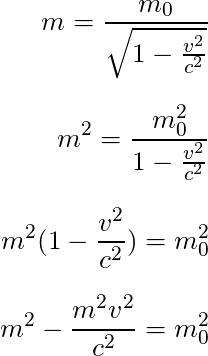
<br>
This is then multpplied by c⁴ to get:
<br>
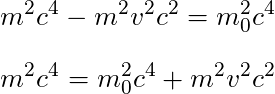
<br>
And finally we know that E=mc² from einsteins famous equation, and p=mv from classical physics so:
<br>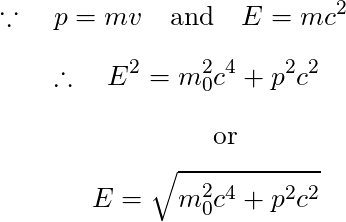
<br>

In [ ]:
#@title <font color="red">QUIZ:</font> Hit play below to see what you know about dark matter!
print("           Why is it difficult to detect dark matter?")
out = widgets.Dropdown(options=[('',9),('It is too massive (heavy) to detect.',0),('It only interacts with the weak and gravitational forces.',1),('We are using the wrong wavelength to detect it.',2),('It only interacts with the electromagnetic force.',3)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==9:
    print('')
  elif guess==1:
    print("\033[1;32;47m Correct!  \n")
  elif guess==0 or guess==2:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m The answer is to do with the forces that WIMPS interact with. It's in the name... \n")
  elif guess==3:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m In fact, our problem is that it doesn't interact with the electromagnetic force at all, making it invisible. \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

           Why is it difficult to detect dark matter?


## 2 - Setting up data for analysis
Now that we understand what dark matter is, and what we're looking for, we can start to look for it. But before we do any kind of analysis we need to get everything ready. This means we have to prepare the data so that we can analyse it to search for dark matter created at the LHC. We will do this with Python.


### 2.1 - What is Python?
[Python](https://opensource.com/resources/python) is a programming language that has a focus on readability and modularity. This is great for scenarios such as collaborations, where multiple people have to be able to read and understand the same code. This entire notebook is a good example of that, and all our code is written in Python.

<br>
<font color="red">TASK:</font> Complete the cell below to print out some text and do a calculation.

In [ ]:
#define the variable "num" below this comment, so that the error is fixed and the code outputs the correct answer when you press play

print("Seven plus two is",num) #The comma separates the text and the calculation, otherwise Python won't be able to process the code properly
#Anything after a '#' is called a comment, and isn't recognised as code by Python. Comments are used to help explain how code works

### 2.2 - What are packages?
When we want to do something specific in Python, we might not have all the tools we need to do so. But as we noted before, Python is very modular (and popular!) which means we can import packages into our code that give us additional functionality, allowing to us perform more specific tasks.
<br>
<br>
We can think of a package as something that gives us more tools that we can use in our code. You might remember that we imported a couple of modules at the start of the notebook to make some of the interactive parts of this notebook work. We will now import some modules that will be necessary for our data analysis:
* [NumPy](https://numpy.org/about/) - NumPy is a module useful for its mathematical functions and the arrays it lets us use. Arrays are a basic but effective way to store data.
* [PyPlot](https://matplotlib.org/stable/gallery/index.html) - PyPlot is a module designed for data visualisation, which helps us understand patterns in data easily, and intuitively.
* [Pandas](https://pandas.pydata.org/about/) - Pandas is a module designed specifically for data analysis. One key part of its functionality is the dataframe, which can effectively store and distribute complicated sets of data.

In [ ]:
import numpy as np #useful for mathematical functions and arrays
import matplotlib.pyplot as plt #useful for data visualisation
import pandas as pd #useful for advanced data analysis and dataframes
import scipy.stats as st #only used once or twice in this notebook - for analysis of statistical significance

### 2.3 - Getting our data ready

Now that we have imported the packages we want to use, let's get the files we want into the workbook and ready to use for our analysis. First, we will put the file information into dataframes which we can work with.
<br>
<br>
So what do the files we will use mean?
<br>
<br>
The <font color='magenta'>'DM_300'</font> file is the file that has data on the dark matter we are searching for, so we call this the <font color='magenta'>signal</font> file. The other files (<font color='olive'>'Non-resonant_ll', 'Z+jets', 'WZ', 'ZZ'</font>) refer to other collision processes that appear similar to the process that produces dark matter - we call these the <font color='olive'>background</font> files. Click on the dropdown for section 2.3.1. to learn a bit more about our files.
<br>
<br>
Make sure to <b>run the code below </b>next. This will download our collision data on dark matter and background processes. If you're accessing the data through a Uni of Sussex google drive, then set "sussex_drive" to <b> True</b>. If you have a USB drive with the data, then set "usb_drive" to <b> True</b> - you'll have to do some of the code yourself. If you're part of a large group of people accessing this notebook right now, then set "group" to <b> True </b>. That will prevent this notebook from downloading data from the internet, so that downloading the data isn't too slow.

<html>
<details>
<summary style="color:orange; font-weight: bold;"><font color="A10000">2.3.1 - What exactly is our data?</font></summary>

These files contain data recorded from simulations created to look like what would happen during collisions at the detector (specifically simulations of 13TeV proton-proton collisions at the Large Hadron Collider).
<br>
<br>
How do we simulate all the events that occur in particle collisions? First, we create a [mathematical model](https://www.mathsisfun.com/algebra/mathematical-models.html) of particle collisions and then we use this model to produce simulated data. In this process randomly generated data helps to make sure that the simulated data is realistic - this is done using the [Monte Carlo method](https://www.youtube.com/watch?v=7ESK5SaP-bc).
<br>
<br>
Another thing to consider is that the number of Monte Carlo simulated events we have and the number of actual data events may be different. To combat this difference we create weights that go along with our Monte Carlo data. These weights allow us to simulate actual data as closely as possible. Please have a look at the following [sidenote](https://docs.google.com/document/d/1B_bzcKqTnBBZ-0K02aurW9o8FgfWlmEO-PxuP-f4ves/edit) to get further discussion on why this is so important.

If we do this all correctly, our simulated data should be identical to data recorded at the actual collider.
<br>
<br>
You will see weights being used in this notebook when you see something that looks like ['<font color="red">totalWeight</font>'] get used. This will apply the weights that we have.  
<br>
<br>
Briefly we'll cover how Monte Carlo (we'll call it simulated data from now on) is used in practice. In CERN analysis simulated data shows us what we expext the data we record to look like. We then record actual data and compare this with the simulated data. If we find differences, our Monte Carlo model must not properly represent the reality of the collisions. This could indicate that we have found new physics - this is [how the Higgs boson was discovered](https://home.cern/science/physics/higgs-boson/how).
</details>
</html>

In [ ]:
#creating our dataframes
sussex_drive = False
usb_drive = False
group = False


DM_300="replace"
Z_jets="replace"
WZ="replace"
ZZ="replace"
NR_ll="replace"
our_dataframes = [Z_jets, WZ, ZZ, NR_ll, DM_300] #we put our event information in a list, making it easier to look through all of it at once using a loop
#"our_dataframes[4]" calls the DM_300 dataframe, "our_dataframes[0]" calls Z_jets, "our_dataframes[1]" calls WZ, etc
dataframe_names = ['Z_jets','WZ','ZZ','NR_ll', 'DM_300'] #this list just has the names of the dataframes so we can make labels
Data_Collected = False

In [ ]:
# @title This cell contains our methods for accessing the code { form-width: "1px", display-mode: "form" }
def read_data_drivelocal():
  if sussex_drive: #checks if the user has a Sussex google drive
    try:
      our_dataframes[4] = pd.read_csv('/content/drive/MyDrive/Data/DM_300.csv') #converts the data at that link into a Pandas dataframe
    except:
      pass
    else:
      our_dataframes[0] = pd.read_csv('/content/drive/MyDrive/Data/Zjets.csv')
      our_dataframes[1] = pd.read_csv('/content/drive/MyDrive/Data/WZ.csv')
      our_dataframes[2] = pd.read_csv('/content/drive/MyDrive/Data/ZZ.csv')
      our_dataframes[3] = pd.read_csv('/content/drive/MyDrive/Data/nonres.csv')
      global Data_Collected
      Data_Collected = True

def read_data_cernsite():
  if group == False: #Checks that the user isn't part of a large group, so it's ok to download data from the internet
    try: #tests if the code can access the data properly
      our_dataframes[4] = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/DM_300.csv')
    except:
      pass  #if it can't be accessed, the code skips trying to download the rest of the data
    else: #if the 'try' statement is successful, we download the rest of the data
      our_dataframes[0] = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/Z+jets.csv')
      our_dataframes[1] = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/WZ.csv')
      our_dataframes[2] = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/ZZ.csv')
      our_dataframes[3] = pd.read_csv('https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/Non-resonant_ll.csv')
      global Data_Collected
      Data_Collected = True

def read_data_newsite():
  if group == False:
    try:
      our_dataframes[4] = pd.read_csv('https://atlas-opendata-el9-preview.webtest.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/DM_300.csv')
    except:
      pass
    else:
      our_dataframes[0] = pd.read_csv('https://atlas-opendata-el9-preview.webtest.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/Z+jets.csv')
      our_dataframes[1] = pd.read_csv('https://atlas-opendata-el9-preview.webtest.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/WZ.csv')
      our_dataframes[2] = pd.read_csv('https://atlas-opendata-el9-preview.webtest.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/ZZ.csv')
      our_dataframes[3] = pd.read_csv('https://atlas-opendata-el9-preview.webtest.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook/Non-resonant_ll.csv')
      global Data_Collected
      Data_Collected = True

In [ ]:
def read_data_fileslocal():
  if usb_drive: #checks if the user has a USB drive
    try:
      our_dataframes[4] = pd.read_csv('If using a USB, insert file path here!') #doesn't work until edited! The user needs to input their own file path,
      our_dataframes[0] = pd.read_csv('If using a USB, insert file path here!') #since there's no way to tell where the datafiles will be if they're inserted using a USB
      our_dataframes[1] = pd.read_csv('If using a USB, insert file path here!')
      our_dataframes[2] = pd.read_csv('If using a USB, insert file path here!')
      our_dataframes[3] = pd.read_csv('If using a USB, insert file path here!')
    except:
      print("There was an error - maybe the file path is incorrect?")
    else:
      global Data_Collected
      Data_Collected = True

for fn in [read_data_fileslocal, read_data_drivelocal, read_data_cernsite, read_data_newsite]:
  fn()
  if Data_Collected == True:
    break
  else:
    continue

DM_300 = our_dataframes[4]
Z_jets = our_dataframes[0]
WZ = our_dataframes[1]
ZZ = our_dataframes[2]
NR_ll = our_dataframes[3]

Now that we have our signal and background files in dataframes, let's have a look at them! There are two main ways you can look at a dataframe. Firstly, you can type the name of the dataframe, which will automatically print the first and last few entries:

In [ ]:
DM_300 #this is our signal file, containing data on DM_300 collisions, where a z-boson decays into two leptons and a proton collision creates dark matter particles

,totalWeight,sum_lep_charge,lead_lep_pt,sublead_lep_pt,mll,ETmiss,dRll,dphi_pTll_ETmiss,fractional_pT_difference,ETmiss_over_HT,N_bjets
0,0.041298,0,113.229602,37.342027,91.874195,124.311867,1.568130,3.036052,0.047148,0.599380,0
1,0.042212,0,89.615922,31.122283,87.832052,105.491891,1.697633,3.083360,0.032974,0.873724,0
2,0.061651,0,112.169008,65.336797,87.876299,170.239734,1.030940,3.133160,0.028335,0.959066,0
3,0.067919,0,108.710273,93.620266,89.113704,221.266453,0.872517,3.052979,0.005579,0.940918,0
4,0.085524,0,85.937289,40.265805,88.230021,132.649672,1.573029,2.554065,0.040406,0.613755,0
...,...,...,...,...,...,...,...,...,...,...,...
486,0.078610,0,78.753086,29.951379,89.358800,83.341703,1.647736,3.060483,0.232954,0.766682,0
487,0.073187,0,94.828984,45.348254,90.757753,127.364039,1.360179,3.128948,0.014387,0.908593,0
488,0.077624,0,121.088344,37.106082,90.977416,162.607063,1.432372,3.068947,0.195871,1.027894,0
489,0.075400,0,166.182469,79.551945,86.336938,252.362641,0.740335,3.119813,0.038813,1.026973,0


### 2.4 - Explaining our data

There's a lot of data above, but so far it hasn't been explained. You don't technically need to understand it fully to complete the notebook, but it will help - and more knowledge is always a good thing.

Above, the data that you see will depend on which file you've loaded - either DM_300 (our signal file), or a background file: NR_ll, Z_jets, WZ or ZZ. These represent the data that we expect ATLAS to collect on the different types of process.

Each <b>row</b> represents a <b>single event</b>, or proton-proton collision, inside ATLAS.

Each <b>column</b> represents a different type of <b> measurement </b> that we can make of the proton-proton collisions.



1.   sum_lep_charge represents the total charge for the leptons that ATLAS detects after the collision. Generally, these will have opposite charge, and so they add to zero.
2. lead_lep_pt represents the transverse momentum of the fastest lepton that ATLAS detects after the collision.
3. sublead_lep_pt represents the transverse momentum of the second-fastest lepton that ATLAS detects after the collision.
4. mll represents the "dilepton invariant mass": the total mass of the two leptons that are our signature.  
5. ETmiss represents the missing transverse momentum - the missing momentum that indicates we may have found dark matter.  
6. HT is the scalar sum of all the momentum after the collision; so ETmiss_over_HT is a measurement of how much of the momentum in a collision is missing.



In [ ]:
DM_300.head()

,totalWeight,sum_lep_charge,lead_lep_pt,sublead_lep_pt,mll,ETmiss,dRll,dphi_pTll_ETmiss,fractional_pT_difference,ETmiss_over_HT,N_bjets
0,0.041298,0,113.229602,37.342027,91.874195,124.311867,1.568130,3.036052,0.047148,0.599380,0
1,0.042212,0,89.615922,31.122283,87.832052,105.491891,1.697633,3.083360,0.032974,0.873724,0
2,0.061651,0,112.169008,65.336797,87.876299,170.239734,1.030940,3.133160,0.028335,0.959066,0
3,0.067919,0,108.710273,93.620266,89.113704,221.266453,0.872517,3.052979,0.005579,0.940918,0
4,0.085524,0,85.937289,40.265805,88.230021,132.649672,1.573029,2.554065,0.040406,0.613755,0


<font color="red">TASK:</font> Let's also look at the dataframe for the WZ process - where a W boson decays into quark jets, and a Z boson decays into two leptons. Try looking at the other dataframes by changing 'WZ' for one of the background names (like ZZ). What differences do you notice? Are there any similarities?

In [ ]:
WZ.head()

,totalWeight,sum_lep_charge,lead_lep_pt,sublead_lep_pt,mll,ETmiss,dRll,dphi_pTll_ETmiss,fractional_pT_difference,ETmiss_over_HT,N_bjets
0,-0.005618,0,120.092289,32.598385,91.323522,123.409516,1.457642,2.839548,0.011781,0.610265,0
1,0.012215,0,83.036422,46.110559,119.507216,130.435344,1.752708,3.114501,0.053578,1.009976,0
2,0.004976,0,79.327570,50.505535,93.198164,139.187078,1.366676,2.612179,0.085608,0.916567,0
3,0.004881,0,88.992898,37.777434,98.078726,110.936937,1.693950,2.777511,0.167089,0.725565,0
4,0.000984,0,137.498797,35.633254,90.521116,163.892562,1.388625,2.948226,0.041063,0.522579,0


Now let's quickly break down what is going on in the dataframe. The number of rows is what we call the number of events in particle physics analysis. These refer to each reading the detector makes (i.e. each time a p-p collision produces particles which are "seen" by ATLAS). Each column is called a feature, and these refer to each bit of physical information we know about the events (such as the transverse momentum of the particles).
<br>
<br>
<font color="red">QUIZ:</font> Hit play below to check what you know about our files and processes (check sections 2.3.1. and 2.3.2.)!

In [ ]:
#@title Q1:
print("           What type of data do our files contain?")
out = widgets.Dropdown(options=[('',9),('Dataframes.',0),('Recorded data from ATLAS.',1),('Simulated data from ATLAS.',2)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==9:
    print('')
  elif guess==0:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m They don't contain dataframes, but the information is stored as a dataframe. \n")
  elif guess==2:
    print("\033[1;32;47m Correct!  \n")
  elif guess==1:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m The data isn't recorded directly from ATLAS, but ATLAS data is used to make sure the simulation is accurate. \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

           What type of data do our files contain?


In [ ]:
#@title Q2:
print("Which processes do not have a Z boson as part of their decay process?")
out = widgets.Dropdown(options=[('',9),('DM+Z-->ll',0),('Non-resonant ll',1),('Z+Jets',2)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==9:
    print('')
  elif guess==0:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m DM+Z-->ll is our signal process which produces dark matter. The process involves a Z-boson decaying into two leptons. \n")
  elif guess==1:
    print("\033[1;32;47m Correct!  \n")
  elif guess==2:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m Z+Jets is a background process involving a Z-boson decaying into two leptons, and a jet. \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

Which processes do not have a Z boson as part of their decay process?


## 3 - Initial analysis
Now that we have created our dataframes, let's put them to use!


### 3.1 - What can we do with our data?

Dataframes have an extremely wide array of applications. Two of the primary applications of dataframes is for data visualisation, and for performing calculations/analysis.
<br>
<br>
First we'll perform some data visualisation. Let's start by using the code below to plot a histogram of the missing transverse momentum of our dark matter signal.

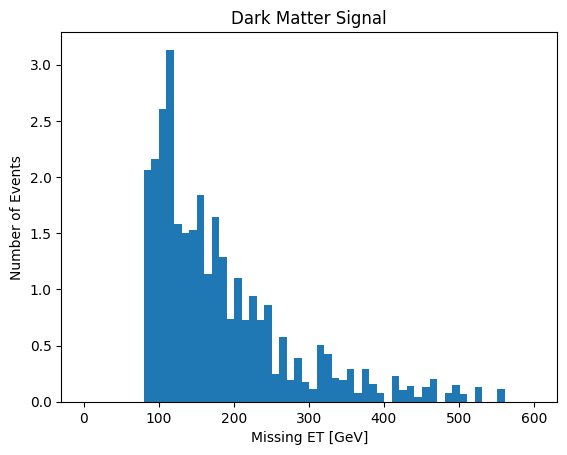

In [ ]:
#code to plot a histogram of the ETmiss (missing transverse energy) of DM_300 (dark matter signal)
plt.hist(DM_300['ETmiss'], weights=DM_300['totalWeight'],bins=60, range = (0,601)) #makes a histogram from the ETmiss up to 600 GeV with 60 bins (bins are just the number of 'bars' in the plot)
plt.xlabel('Missing ET [GeV]') #x-axis label (with units)
plt.ylabel('Number of Events') #y-axis
plt.title('Dark Matter Signal') #plot title
plt.savefig('MissingET_DM_300')
plt.show() #creates the plot

This plot shows how the dark matter signal events are spread out, depending on the missing momentum. Specifically this histogram shows the missing transverse momentum: how much momentum the dark matter particles have when they leave the ATLAS detector.
<br>
<br>
You can see that the events are cut off before 80 GeV. This is because when the files we are using were created, a pre-selection was done. A pre-selection is when events are removed before performing a search - part of the pre-selection done on our files was to remove events with missing $E_T$ below 80 GeV. This is because these events are unlikely to be genuine evidence of dark matter.
<br>
<br>
<font color="red">QUIZ:</font> Hit play below and answer the question to understand why histograms can be helpful!

In [ ]:
#@title Q1:
print("             Why are histograms useful?")
out = widgets.Dropdown(options=[('',9),('They\'re not, they\'re boring',0),('They help us visualise our data and see patterns in it',1),('They show us unrecorded data',2),('They show us if our data was recorded correctly',3)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==9:
    print('Choose your answer')
  elif guess==0:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m Ah come on, you knew this one was wrong \n")
  elif guess==1:
    print("\033[1;32;47m Correct!  \n")
  elif guess==2:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m Unfortunately a histogram can only show the data you input into it. \n")
  elif guess==3:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m Though this could be true in some rare circumstances, most of the time they won't help you with this. \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

             Why are histograms useful?



We will now construct another plot of the missing transverse energy, this time using the data on the ZZ process rather than the DM_300 process.
<br>
<br>
<font color = "red">TASK:</font> Fill out the gaps in the below code to create the ZZ plot:

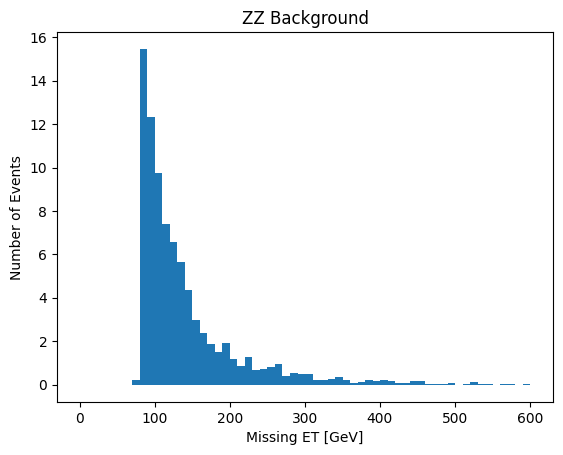

In [ ]:
#replace the "..." with what is appropriate to complete the code and fix the error
plt.hist(ZZ['ETmiss'], weights=ZZ['totalWeight'],bins=60, range = (0,601)) #makes a histogram from the ETmiss up to 600 GeV with 60 bins (bins are just the number of 'bars' in the plot)
plt.xlabel('Missing ET [GeV]') #x-axis label (with units)
plt.ylabel('Number of Events') #y-axis
plt.title('ZZ Background') #plot title
plt.savefig('MissingET_ZZ')
plt.show() #creates the plot

Try to spot some differences between the plots, and then open the collapsed section below to see the differences that we could find.
<details><summary>Open this once you've found a difference between the plots</summary>
The two plots have a different shape. The peak number of ZZ process events happens at less than 100 missing GeV of momentum, whereas the peak number of DM-300 (DM+Z->ll) events happens at roughly 120 missing GeV of momentum. This suggests that ZZ events have much less missing momentum, which makes sense since they don't involve dark matter.

<font size="2">As you can see from the y-Axis, there are far more ZZ events than DM_300 events. This makes sense, because there is far more background than signal in our data.</font></details>
<br>
<font size="3">Now we're going to make one more histogram plot - but this time you can try to write out the code yourself. We'll be using the ZZ background file for the plot, but instead of missing transverse energy (ETmiss) we want to plot transverse momentum of the leading lepton (lead_lep_pt), which has units of GeV.</font>
<details>
<summary style="color:orange; font-weight: bold;"><font color="0000A1">3.1.1 What does the transverse momentum of the leading lepton mean?</font></summary>
As we discussed earlier, the signature we are looking for is that of two leptons and missing transverse momentum. Of these two leptons, one reaches the detector first, because it is faster and has more momentum. This is our leading lepton.
</details>

<font color = "red">TASK:</font> Write the code to make a plot of the lead_lep_pt variable using the ZZ file!

In [ ]:
#write code to plot a histogram of lead_lep_pt for the ZZ background file. Have a look at the code for other histograms to work it out.
...

Great job on programming this plot yourself! :D
<br>
<br>
We have quite a few columns of information for each file. If we plotted histograms for all these columns and for every file, we would have so many histograms that we would be confused about how to analyse them! So let's look at a way to make things clearer.
<br>
### 3.2 - Stacked histograms
It's confusing to look from one plot to another constantly, so let's put our histograms together to make comparison easier. This is called a stacked histogram.
<br>
<br>
Before we plot a stacked histogram, let's put our dataframes in a list. This will make it easier to write code for the stacked histogram. Hit play on the below code to initialise some variables that we'll be using.

In [ ]:
our_dataframes = [NR_ll, Z_jets, WZ, ZZ, DM_300] #we put our event information in a list, making it easier to look through all of it at once using a loop
dataframe_names = ['NR_ll','Z_jets','WZ','ZZ','DM_300'] #this list just has the names of the dataframes so we can make labels

Now let's run the below code to make a stacked histogram of the missing transverse momentum (ETmiss) using our dark matter signal and all of our backgrounds.

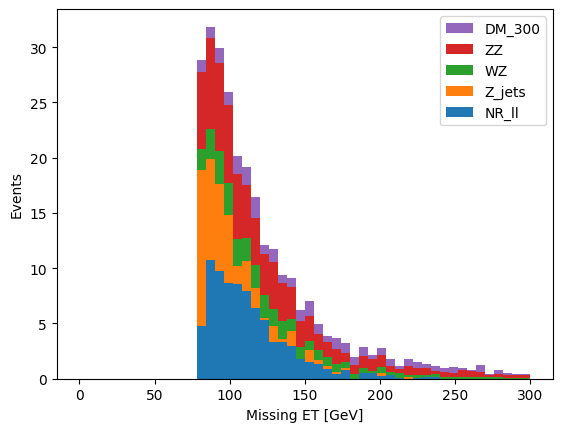

In [ ]:
stacked_variable = [] #list to hold the infromation from all the files that we will plot
stacked_weights = [] #list to hold the weights from each file

for i in our_dataframes: #goes through each item in the list (i.e. it goes through each of the files)
    info = i['ETmiss'] #grabs the missing transverse energy information from each file
    stacked_variable.append(info) #adds this information to stacked_variable, so it can be used for plotting
    stacked_weights.append(i['totalWeight'])

plt.hist(stacked_variable,weights=stacked_weights, label=dataframe_names, stacked=True, bins=50, range = (0,300)) #this plots our stacked histogram (see stacked=True) with labels from the list of our dataframes
#note that there are events past 300, but we won't look at them as it's not super relevant to what we're doing
plt.xlabel('Missing ET [GeV]') # x-axis label
plt.ylabel('Events') # y-axis label
plt.legend(reverse=True) # add legend to plot
plt.show()

### 3.3 - Significance
We are able to see that we have some dark matter signal in purple above, but there's a problem. Our problem is that there's a chance these results were a fluke - that the purple in the histogram appeared through pure coincidence. Imagine rolling 10 dice, and more than half of them are sixes. This could be evidence that the dice are unfair, but it could also be random chance.

It's obviously very important to know how likely it is that our results are a fluke in our dark matter search. The way we do this is by checking what we call the [statistical significance](https://youtu.be/73JeQ2RZnwc) of the dark matter signal compared to the background.  

As you know, our data should contain some signal, but it also contains a large amount of background that looks similar to the signal. Continuing with the dice analogy, the signal would be whenever a dice rolls a six because it's an unfair dice: the background would be whenever a fair dice rolls a six through pure chance. The statistical significance is a measure of how unlikely it is that the result is a fluke. If you roll 10 dice, and 4 of them are sixes, there's roughly a 5.5% chance that this happened randomly. But if 5 of them are sixes, you can be more certain the dice are weighted - there's only approximately a 1.3% chance that it happened randomly and if there are 6 sixes then the probability that this happened by chance drops to 0,2%!

Since our search for dark matter is a scientific study, we need to be really certain that our results are good evidence of dark matter. We want there to be a less than 0.3% chance that the results are just a random fluke. If this was case, wewould say that our results would have a statistical significance of <b>three sigma</b>.

Sigma is a scientific shorthand to describe how statistically significant a result is and comes from the symmetric normal distribution, where there is a probability of 0.997 that a random sample from this distribution lies within three standard deviaitons (which is donoted by the Greek letter 'sigma') of the mean  The diagram below shows the normal distribution in terms of its standard deviaiton, sigma.

<img src="https://miro.medium.com/max/954/1*qbIWZyXxjkWt7dQLJX3Tsg.png" width="800" style="width:40%;" align = "centre"></img>
<br>


In phyics, when we  calculate the significance of a result we express the probability that the result is a fluke by using the shorthand sigma. If a result has significance or 3 sigma, we are saying that there is a 0.3% chance that this reult occured by fluke and this is pretty good evidence that our dark matter signal is true dark matter.
<br>
<br>
How we calcualte significane depends on the experiments we are considering. In the dice example above, the significance was affected by the number of dice rolled, and the amount that came up as six. In our case, we can calculate our significance using the total number of recorded collisions, and the amount of collisions that caused a DM+Z->ll process.

To estimate our significance, we can use a popular estimator (although other more complicated and accurate estimators can be found):
<br>
<br>
$\frac{\text{Total Signal Weight}}{\sqrt{\text{Total Background Weights}}}$
<br>
<br>


<font color = "red">TASK:</font> Below, you can try to create Python code to calculate the significance! You need to input the significance using the formula above.

<font color = "red">HINT: there are two ways you can find the square root of something</font>

You can put it to the power of 0.5 using the '\*\*\' operator, for example, 'square root of x' could be found by writing 'x\*\*0.5'.

Or you can call the 'sqrt' function from NumPy: np.sqrt(x)

In [ ]:
signal_weight = 0
background_weight = 0
#we initialize these variables at zero

for i in range(0,4):
  background_weight += sum(our_dataframes[i]['totalWeight']) #Calculates the total background weight

signal_weight += sum(our_dataframes[4]['totalWeight']) #Calculates the total signal weight

#----------------Calculate the significance here, according to our equation above! ---------------------
significance =
#------------------------------------------------------------------------------------------------------

sig_4decimal = '%.4f'%significance
print("Our new significance is: "+ sig_4decimal+"σ")
def probability_analysis(significance):
  return 100*st.norm.cdf(significance)

prob_3decimal = '%.3f'%(probability_analysis(significance))
print("The probability that our result is genuine evidence of dark matter is: "+ prob_3decimal +"%")
prob_3decimal_not = '%.3f'%(100-probability_analysis(significance))
print("The probability that our result appeared out of pure chance is: "+ prob_3decimal_not +"%")

Our new significance is: 1.9757σ
The probability that our result is genuine evidence of dark matter is: 97.590%
The probability that our result appeared out of pure chance is: 2.410%


We can see that this number is quite far from the significance of 3 that we are aiming for, so right now we can't say that we have evidence for dark matter. At this significance, there is a 2.41% chance that our result is a complete fluke. It's unlikely, but we want to be nearly completely certain.
<br>
<br>
So what do we do now? We try to get rid of as much background as possible from our data while keeping as much signal as possible. This will increase the significance of our result. This is done using a technique known as <b>cut-based analysis.</b>
<br>
<br>
<font color = "red">TASK:</font> Press play to check your knowledge on significance!

In [ ]:
#@title Q1:
print("         Why is a high significance important?")
out = widgets.Dropdown(options=[('',9),('A high significance means we have more important results',0),('A large significance means we have lots of signal',2),('A high significance means it is unlikely that our theory is a fluke',1)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==9:
    print('')
  elif guess==0:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m The significance is a measure of how unlikely a result is to happen randomly, but it can't measure how important the results will be if they're accurate \n")
  elif guess==1:
    print("\033[1;32;47m Correct!  \n")
  elif guess==2:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m High significance doesn't always mean we have lots of signal, but it does always mean we have a greater proportion of signal to background \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

         Why is a high significance important?


## 4 - Cut-based analysis
As we've just seen, our significance isn't good enough yet, because we have a very large quantity of background data and a very small amount of signal. Imagine that you've rolled a die thousands of times, and it rolls a six just a little bit more than you expect. We will try to solve this problem with cut-based analysis. This is the method that we will be using to improve our significance. Just like the name implies, this method cuts out parts of our data to try and get rid of as much background whilst keeping as much signal as possible.

What is a cut? Put simply, a cut is just a condition - the data that satisfies a condition is kept, and the rest we get rid of. A real world example of a cut would be a height restriction at a theme park - if your height is not greater than the minimum, you can't get on. Essentially the theme park has "cut out" all the people below a certain height. We aim to "cut out" as much of our background data as we can, while keeping as much of our signal as we can.
<br>
<br>
<br>
<br>
<img src="https://themeparkreview.com/forum/uploads/monthly_2011_03/SS4.jpg.fac76c1047781a89f79a59cb8dc018cc.jpg" style="width:50%;" align="right">
<!---man this really makes me want to go to thorpe park again T.T-->


This is where the dice analogy breaks down. When rolling loaded dice, it's impossible to work out if you rolled a six randomly, or because the dice are loaded. There's no difference between the two outcomes. But as we've seen so many many times in this notebook, real life is complicated, and we can finally turn this to our advantage! In order to get rid of as much background as possible (while keeping our signal), we try to find differences in the data between background processes and the process we really want, DM+Z->ll. We then set up cuts to exploit those differences and get rid of as many background processes as possible, so that we're left with more actual DM+Z->ll in the data. The evidence for dark matter will then become much clearer!

### 4.1 - Which cuts should we do?
We have a lot of events (rows in our dataframes), so we need to cut down how many we have. How are we going to choose what cuts we will use to do that? Fortunately, we can look at a paper from ATLAS to help us. Page 6 from [this paper](https://arxiv.org/pdf/1708.09624.pdf) has a table describing cuts performed on very similar simulated data files, and we will be basing our cuts on what they did in their similar analysis. Almost all scientific studies are built on each other's shoulders - every discovery and new technique might later be used for more discoveries, used in more complicated techniques. So we can keep pushing further, using previous discoveries to keep going.

<br>


### 4.2 - Cut 1: Dilepton invariant mass ($m_{ll}$)

Let's break down what this term means before we do anything.
<br>
Dilepton refers to the two leptons that are created in our collisions. Invariant mass is the mass of something when it is not moving from the observer's point of view (which we call the observer's [*frame of reference*](https://www.youtube.com/watch?v=3yaZ7lkQPUQ)).

So the dilepton invariant mass, is the rest mass of the two leptons generated in the DM+Z->ll process. We know that in a DM+Z->ll process, these leptons come from a Z-Boson. Therefore, in a DM+Z->ll process, the total mass of the two leptons must equal the mass of the Z-Boson that created them in our process. In background processes, that's less likely. So cutting out events where $m_{ll}$ is too far from 90GeV will get rid of a lot of background events.
<br>
<br>
The video below has a description of invariant mass (also called rest mass) from 3:24 to 3:42.

In [ ]:
#@title Video: Invariant Mass
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/XkPudRiWspc" frameborder="0" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Now that we understand dilepton invariant mass a bit better, let's make a plot of it below, which should help you choose what events to cut out. Remember the mass of the Z-Boson!


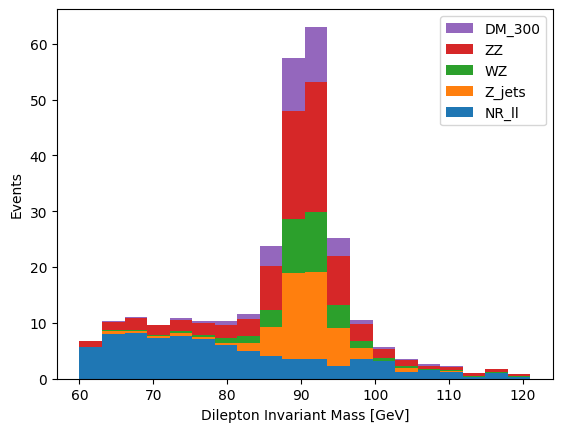

In [ ]:
stacked_variable = [] # list to hold the infromation from all the files that we will plot
stacked_weights = [] #list to hold the weights from each file

for i in our_dataframes: #goes through each item in the list (i.e. it goes through each of the files)
    info = i['mll'] #grabs the missing transverse energy information from each file
    stacked_variable.append(info) #adds this information to stacked_variable, so it can be used for plotting
    stacked_weights.append(i['totalWeight']) #grabs weight info to be applied

plt.hist(stacked_variable,weights=stacked_weights, label=dataframe_names, stacked=True, bins=20, range = (60,121)) #this plots our stacked histogram (see stacked=True) with labels from the list of our dataframes
plt.xlabel('Dilepton Invariant Mass [GeV]') # x-axis label
plt.ylabel('Events') # y-axis label
plt.legend(reverse=True) # add legend to plot
plt.savefig("DileptonIM_NoCut")
plt.show()

You can see that most of our backgruond events, and almost all our signal events, happen at around 90GeV. But there are still some signal events that happen around 80 or 100GeV.

Cutting out the data very close to 90GeV - perhaps getting rid of everything except 88-92GeV - will get rid of a lot of background, but it will also get rid of some signal. This is known as a "tight" cut.

If you cut further away from 90GeV - perhaps keeping everything between 80-100GeV - you will get rid of less background, but you'll keep almost all the signal. This is known as a "loose" cut.
<br>
<br>
Now let's make the cut. Press play on the cell below and use the slider to choose a range of values to keep in this plot. Do you want a tight cut, a loose cut, or somewhere in between?
<br>
<br>
<font color="red">TASK:</font> Press play below and use the sliders to choose the upper and lower limits for this cut.

In [ ]:
#@title
test = [] #this is a list that will hold the values shown on the slider
def readable_output(x): #this function lets us show+use the numbers on the slider
  test.append(x) #adds the values on the sliders to the above list
  return x #shows the numbers on the slider in the form (x,y)
widgets.interact(readable_output, x = widgets.IntRangeSlider(value=[50, 130],min=50,max=130,step=2,description='mll Cut:'))
#above creates the slider and makes it interact with our function above

interactive(children=(IntRangeSlider(value=(50, 130), description='mll Cut:', max=130, min=50, step=2), Output…

<function __main__.readable_output(x)>


Now that you've chosen a range of values to keep, we can move on to performing the cut with the values you've chosen.

#### 4.2.1 - Cut on $m_{ll}$
The below code cell contains the code to cut out the data that lies outside the range of values that you chose above. Run this code and then continue to see what affect it has!
<br>
<br>
<font color="red">TASK:</font> Run the below code to perform your first cut!
<br>
<br>
(Once you run this cell, you'll have to use the code hidden under 'Retry cut?' before you can change the cut values you've chosen.)

In [ ]:
cut_lower,cut_upper = test[-1] #this grabs the numbers on the slider

for i in our_dataframes: #goes over each dataframe
    cut_lb = list(i.index[i['mll']<cut_lower]) #list of the events below lower cut value
    cut_ub = list(i.index[i['mll']>cut_upper]) #list of the events above upper cut value
    #print(cut_lb,cut_ub) #you can uncomment to show which rows will be removed
    i.drop(cut_lb,inplace=True)
    i.drop(cut_ub,inplace=True) #these two lines remove the events in the lists

Just like that we've performed a cut!
<br>
Let's plot another histogram for the dilepton invariant mass to see what has changed as a result of our cut.

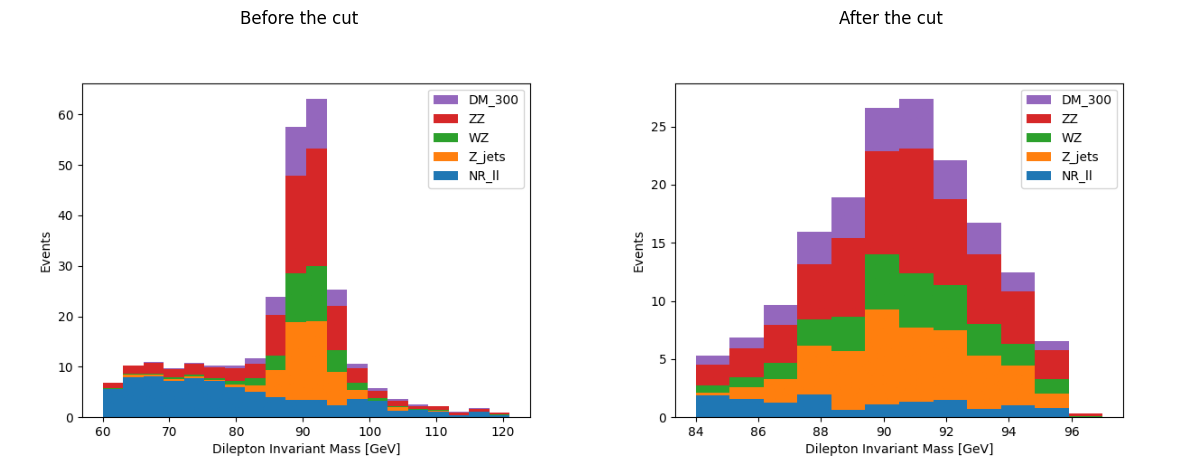

Notice the difference in the range of data shown on the x-axis: the second plot is actually just a small subset of the first
You can also see that the y-axis is different, because each individual bar is showing less events


In [ ]:
stacked_variable = []
stacked_weights = []
bin_num = int((cut_upper-cut_lower)/5) #this calculates how many bins we need (as we want bins to only be 5 GeV wide)
for i in our_dataframes:
    info = i['mll']
    stacked_variable.append(info)
    stacked_weights.append(i['totalWeight'])

plt.hist(stacked_variable, weights=stacked_weights, label=dataframe_names, stacked=True, bins=(cut_upper-cut_lower), range = (cut_lower,(cut_upper+1)))#note that we use cut_upper+1, this +1 makes our bins land on whole numbers
plt.xlabel('Dilepton Invariant Mass [GeV]') # x-axis label
plt.ylabel('Events') # y-axis label
plt.legend(reverse=True) # add legend to plot
plt.savefig('DileptonIM_Cut') #to save the plot to local files
plt.close() #to stop MatPlotLib from showing the plot later

#--------------------------------

fig, axes = plt.subplots(1, 2) #to define that we want two columns and one row of subplots
ax0, ax1 = axes.flatten()

DileptonIM_NoCut = plt.imread('/content/DileptonIM_NoCut.png') #to read the NoCut file
ax0.imshow(DileptonIM_NoCut) #to show the NoCut file
ax0.set_title("Before the cut")
ax0.axis('off') #to get rid of extra axes

DileptonIM_Cut = plt.imread('/content/DileptonIM_Cut.png') #to read the Cut file
ax1.imshow(DileptonIM_Cut) #to show the Cut file
ax1.set_title("After the cut")
ax1.axis('off') #to get rid of extra axes

fig.set_figwidth(12)
fig.set_figheight(6)
fig.tight_layout()
plt.show()

print("Notice the difference in the range of data shown on the x-axis: the second plot is actually just a small subset of the first")
print("You can also see that the y-axis is different, because each individual bar is showing less events")

What we are able to see here is that we now only have the events that are within the boundaries of the cut we set before. We can think of this like we have 'zoomed in' on the part of the $m_{ll}$ we are interested in.
<br>
Now let's check the significance of the remaining events after the cut to see if we improved the valueby running the code below.

In [ ]:
signal_weight = 0
background_weight = 0

for i in range(0,4):
  background_weight += sum(our_dataframes[i]['totalWeight'])

signal_weight += sum(our_dataframes[4]['totalWeight'])
significance = signal_weight/(np.sqrt(background_weight))
significance
sig_3decimal = '%.3f'%significance
print("Our new significance is: "+ sig_3decimal+"σ")
prob_2decimal = '%.2f'%probability_analysis(significance)
print("The probability that our result is genuine evidence of dark matter is: "+ prob_2decimal +"%")

Our new significance is: 2.183σ
The probability that our result is genuine evidence of dark matter is: 98.55%


How has the significance changed? Has it increased? Does it still fall short of our desired significance?
<br>
<br>
<font color="red">QUIZ:</font> Hit play below to check your knowledge!

In [ ]:
#@title
print("     What is the significance we want to reach?")
out = widgets.Dropdown(options=[('',9),('102',0),('5',1),('2',2),('3',3)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==9:
    print('')
  elif guess==0:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m This is extremely high! This would mean absolute certainty, which is very hard to achieve. \n")
  elif guess==1:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m A significance of 5 is often used in particle physics, and it's necessary if you want to claim a \"discovery\". However we're just looking for evidence. \n")
  elif guess==2:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m A significance of 2 is often used in science, such as the social sciences or psychology, where it's hard to get clear evidence of a phenomenon. We want slightly more evidence though. \n")
  elif guess==3:
    print("\033[1;32;47m Correct!  \n")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])


     What is the significance we want to reach?


Think you can change this cut to get a better significance? Go down to the "Retry?" drop-down to try make a different cut if you want to give it another go! This code reloads the original data, without any cuts. Just be aware that it will get rid of all your cuts, every time you use it.

###### Retry cut?

Run the cell below to reload all of the files so that you can try your cut again

In [ ]:
#below reloads files to reset the changes. Run this whenever you want to retry an old cut
Data_Collected = False
for fn in [read_data_fileslocal, read_data_drivelocal, read_data_cernsite, read_data_newsite]:
  fn()
  if Data_Collected == True:
    break
  else:
    continue

DM_300 = our_dataframes[0]
Z_jets = our_dataframes[1]
WZ = our_dataframes[2]
ZZ = our_dataframes[3]
NR_ll = our_dataframes[4]

### 4.3 - Cut 2: Missing transverse momentum ($E_{Tmiss}$)
Let's continue by making another cut to further improve our significance. This time we will do a cut on the missing transverse momentum, $E_{Tmiss}$.You can probably figure out why this is a useful cut to make: missing momentum can be caused by dark matter, so the more missing momentum there is, the more likely that there is dark matter.

Therefore, we can cut out data with less missing momentum, and this will help us have a higher proportion of signal to background in our data.
<br>
<br>
If we have a look at the paper we are basing our cuts on ([link](https://arxiv.org/pdf/1708.09624.pdf)), we see that the paper decides to keep all the events with missing $E_T$ above 90 GeV. This makes sense, considering that the peak of the dark matter signal occurs around that point (remember the $m_{ll}$ graph we made earlier?). So now we will replicate that cut.
<br>
<br>
<font color="red">TASK:</font> Hit play and use the checkboxes to choose a cut to use! This cut will exclude any events below the threshold you choose. The paper we're basing our cut on chose 90GeV, but you can choose others if you want. Use the graph to figure out where you want to cut: remember, you want the greatest proportion of dark matter (in purple) to all the background processes.

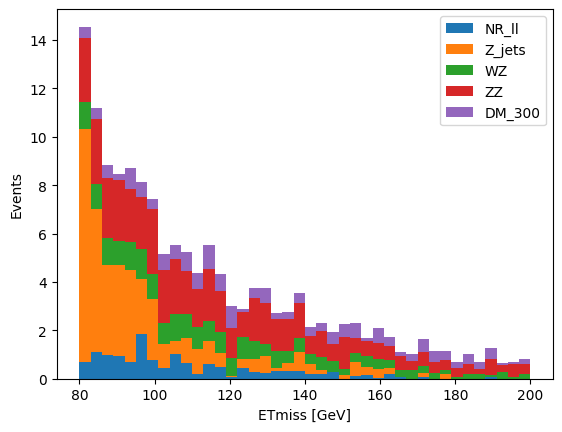

In [ ]:
stacked_variable = [] # list to hold the infromation from all the files that we will plot
stacked_weights = [] #list to hold the weights from each file

for i in our_dataframes: #goes through each item in the list (i.e. it goes through each of the files)
    info = i['ETmiss'] #grabs the missing transverse energy information from each file
    stacked_variable.append(info) #adds this information to stacked_variable, so it can be used for plotting
    stacked_weights.append(i['totalWeight']) #grabs weight info to be applied

plt.hist(stacked_variable,weights=stacked_weights, label=dataframe_names, stacked=True, bins=40, range = (80, 200)) #this plots our stacked histogram (see stacked=True) with labels from the list of our dataframes
plt.xlabel('ETmiss [GeV]') # x-axis label
plt.ylabel('Events') # y-axis label
plt.legend() # add legend to plot
plt.savefig("ETmissAll_NoCut")
plt.show()

In [ ]:
#@title
selection = [] #here we store info on what button is currently pressed
def button_check(x):
  selection.append(x) #adds the output of the buttons to the list
widgets.interact(button_check, x = widgets.ToggleButtons(options=['80 GeV', '85 GeV', '90 GeV', '95 GeV', '100 GeV'], description='Missing Et:', button_style='info')) #creates buttons and lets them work with function

interactive(children=(ToggleButtons(button_style='info', description='Missing Et:', options=('80 GeV', '85 GeV…

<function __main__.button_check(x)>

###### If you want to retry your cuts, run this cell to reset all the cuts

Run the below code cell to retry the cut. This will get rid of all the cuts. You'll have to redo the first cut as well.

In [ ]:
Data_Collected = False
for fn in [read_data_fileslocal, read_data_drivelocal, read_data_cernsite, read_data_newsite]:
  fn()
  if Data_Collected == True:
    break
  else:
    continue

DM_300 = our_dataframes[0]
Z_jets = our_dataframes[1]
WZ = our_dataframes[2]
ZZ = our_dataframes[3]
NR_ll = our_dataframes[4]

Now that you've selected your cut, we can now use it on the data, run the code cell below and see how the significance has changed.

#### 4.3.1 - Cut on $E_{Tmiss}$

<font color="red">TASK:</font> Run the code below to perform the cut on missing $E_T$ and calculate the significance after this cut!

In [ ]:
var = selection[-1]
for i in our_dataframes: #goes over each dataframe (after it was cut earlier)
    if var=='80 GeV': #checks if you chose the 80 GeV button
        cut_val = list(i.index[i['ETmiss']<80]) #makes a list of events to drop accordingly
    elif var=='85 GeV':
        cut_val = list(i.index[i['ETmiss']<85])
    elif var=='90 GeV':
        cut_val = list(i.index[i['ETmiss']<90])
    elif var=='95 GeV':
        cut_val = list(i.index[i['ETmiss']<95])
    elif var=='100 GeV':
        cut_val = list(i.index[i['ETmiss']<100])
    #print(cut_val) #you can uncomment to show which rows will be removed
    i.drop(cut_val,inplace=True) #this line removes the events in the list

stacked_variable = [] # list to hold the infromation from all the files that we will plot
stacked_weights = [] #list to hold the weights from each file

for i in our_dataframes: #goes through each item in the list (i.e. it goes through each of the files)
    info = i['ETmiss'] #grabs the missing transverse energy information from each file
    stacked_variable.append(info) #adds this information to stacked_variable, so it can be used for plotting
    stacked_weights.append(i['totalWeight']) #grabs weight info to be applied

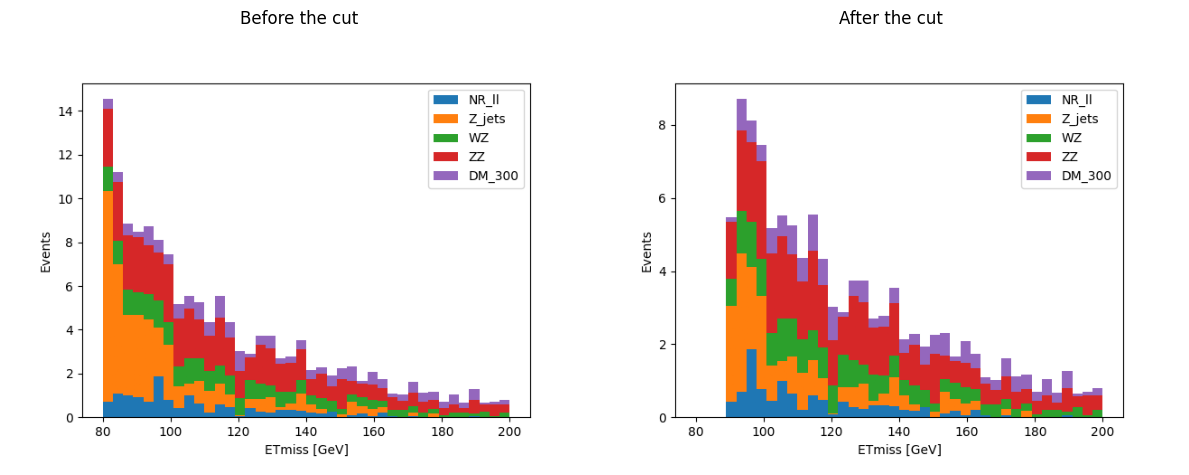

Our new significance is: 2.3738σ
The probability that our result is genuine evidence of dark matter is: 99.120%


In [ ]:

########################################Graph generation below#########################################
stacked_variable = [] # list to hold the infromation from all the files that we will plot
stacked_weights = [] #list to hold the weights from each file

for i in our_dataframes: #goes through each item in the list (i.e. it goes through each of the files)
    info = i['ETmiss'] #grabs the missing transverse energy information from each file
    stacked_variable.append(info) #adds this information to stacked_variable, so it can be used for plotting
    stacked_weights.append(i['totalWeight']) #grabs weight info to be applied

plt.hist(stacked_variable,weights=stacked_weights, label=dataframe_names, stacked=True, bins=40, range = (80, 200)) #this plots our stacked histogram (see stacked=True) with labels from the list of our dataframes
plt.xlabel('ETmiss [GeV]') # x-axis label
plt.ylabel('Events') # y-axis label
plt.legend() # add legend to plot
plt.savefig("ETmissAll_Cut")
plt.close()

fig, axes = plt.subplots(1, 2) #to define that we want two columns and one row of subplots
ax0, ax1 = axes.flatten()

DileptonIM_NoCut = plt.imread('/content/ETmissAll_NoCut.png') #to read the NoCut file
ax0.imshow(DileptonIM_NoCut) #to show the NoCut file
ax0.set_title("Before the cut")
ax0.axis('off') #to get rid of extra axes

DileptonIM_Cut = plt.imread('/content/ETmissAll_Cut.png') #to read the Cut file
ax1.imshow(DileptonIM_Cut) #to show the Cut file
ax1.set_title("After the cut")
ax1.axis('off') #to get rid of extra axes

fig.set_figwidth(12)
fig.set_figheight(6)
fig.tight_layout()
plt.show()


########################################Significance calculation below########################################


signal_weight = 0
background_weight = 0

for i in range(0,4):
  background_weight += sum(our_dataframes[i]['totalWeight'])

signal_weight += sum(our_dataframes[4]['totalWeight'])
significance = signal_weight/(np.sqrt(background_weight))
significance
sig_4decimal = '%.4f'%significance
print("Our new significance is: "+ sig_4decimal+"σ")
def probability_analysis(significance):
  return 100*st.norm.cdf(significance)

prob_3decimal = '%.3f'%probability_analysis(significance)
print("The probability that our result is genuine evidence of dark matter is: "+ prob_3decimal +"%")

We should be able to see that the significance has clearly been improved by performing this cut, but we're still a little bit off from the value of 3 that we want.
<br>
<br>
<font color="red">QUIZ:</font> Press play and check what you know about cuts!

In [ ]:
#@title
print("                Why are cuts useful?")
out = widgets.Dropdown(options=[('',9),('They manipulate data to make our statistical significance look bigger than it should be',0),('They cut out less useful parts of our data to increase our statistical significance',1),('They allow us to cut out all the background without getting rid of any signal',2)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==9:
    print('')
  elif guess==0:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m Though they do make the statistical significance bigger, this isn't some kind of trick - cutting genuinely makes the result less likely to be a fluke.")
  elif guess==1:
    print("\033[1;32;47m Correct!  \n")
  else:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m Though they should cut out much more background than signal, it's generally impossible to cut out all the background, or to avoid cutting out a little bit of signal.")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

                Why are cuts useful?


### 4.4 - Cut 3: $E_{Tmiss}/H_T$
Now we will further improve our significance by taking the cut we just did a step further by making it more advanced. We will do this by making a cut on the variable $E_{Tmiss}/H_T$.
<br>
Let's break this down so we understand what this cut means. We already know that $E_{Tmiss}$ is the missing transverse momentum, but what is $H_T$?
<br>
<br>
$H_T$ is the (scalar) sum of all the momentum resulting from a collision, except for the missing momentum, $E_T$. The ratio of the two, $E_{Tmiss}/H_T$,  helps us identify dark matter events: for a DM-300 dark matter event, this ratio will be larger than usual. Therefore we can cut out data where this ratio is small to get rid of some background while keeping as much signal as possible.
<br>
<br>
According to the paper, events with an $E_{Tmiss}/H_T$ ratio above **0.6** are kept. Now, we'll work on recreating this cut. There's a few bits of code here - the second cell does the actual cut. The rest is dedicated to visualising the cut.

Now, you can try to complete the code for this cut yourself!
<br>
<br>
<font color="red">TASK:</font> Fill in the spaces in the code below to complete this cut - you will need to write the name of the column of the $E_{Tmiss}/H_T$ that is used in the dataframes, and you will also have to write in the value of the ratio above which events are kept.

In [ ]:
###################### Visualising the data before the cut ##########################

stacked_variable = []
stacked_weights = []
bin_num = 40

for i in our_dataframes:
    info = i['ETmiss_over_HT']
    stacked_variable.append(info)
    stacked_weights.append(i['totalWeight'])

plt.hist(stacked_variable, weights=stacked_weights, label=dataframe_names, stacked=True, bins=bin_num, range = (0.4, 1.4))
plt.xlabel('ETmiss over HT') # x-axis label
plt.ylabel('Events') # y-axis label
plt.legend() # add legend to plot
plt.savefig('EToverHTNo_Cut.png')
Image('EToverHTNo_cut.png')
#plt.show
plt.close()

In [ ]:
################# This simple code does the actual cut! #############################

for i in our_dataframes: #goes through the remaining events in the files after 2nd cut
    cut_val = list(i.index[i['ETmiss_over_HT']<0.6]) #finds all events with ETmiss/HT below our threshold
    i.drop(cut_val,inplace=True) #and removes them
#print(cut_val) #If you want to see what data we're removing, you can uncomment this bit of code

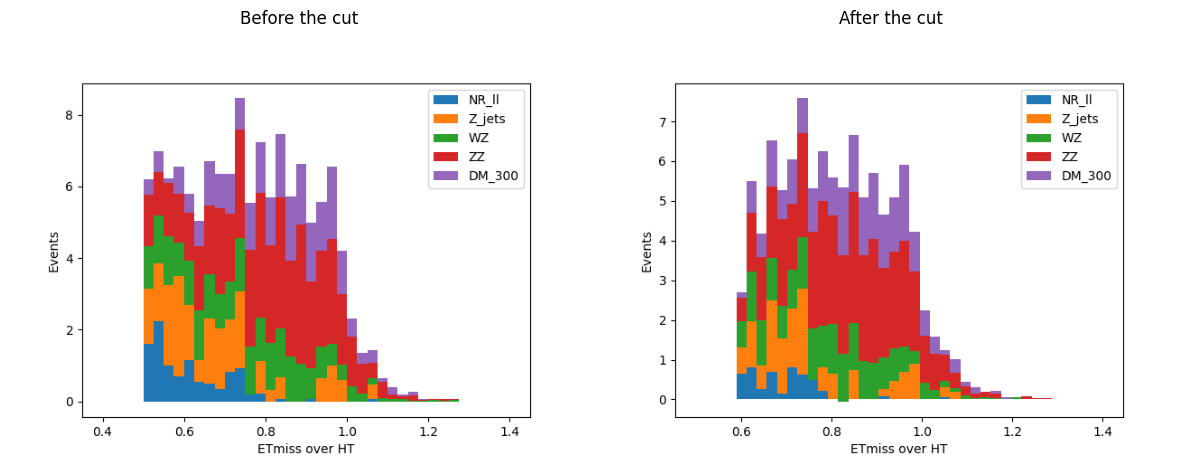

Our new significance is: 2.487σ
The probability that our result is genuine evidence of dark matter is: 99.36%


In [ ]:
############################### Histogram generation ######################################
stacked_variable = []
stacked_weights = []
bin_num = 40

for i in our_dataframes:
    info = i['ETmiss_over_HT']
    stacked_variable.append(info)
    stacked_weights.append(i['totalWeight'])

plt.hist(stacked_variable, weights=stacked_weights, label=dataframe_names, stacked=True, bins=bin_num, range = (0.5, 1.4))
plt.xlabel('ETmiss over HT') # x-axis label
plt.ylabel('Events') # y-axis label
plt.legend() # add legend to plot
plt.savefig('EToverHTCut.png')
plt.close()

fig, axes = plt.subplots(1, 2) #to define that we want two columns and one row of subplots
ax0, ax1 = axes.flatten()

DileptonIM_NoCut = plt.imread('/content/EToverHTNo_Cut.png') #to read the NoCut file
ax0.imshow(DileptonIM_NoCut) #to show the NoCut file
ax0.set_title("Before the cut")
ax0.axis('off') #to get rid of extra axes

DileptonIM_Cut = plt.imread('/content/EToverHTCut.png') #to read the Cut file
ax1.imshow(DileptonIM_Cut) #to show the Cut file
ax1.set_title("After the cut")
ax1.axis('off') #to get rid of extra axes

fig.set_figwidth(12)
fig.set_figheight(6)
fig.tight_layout()
plt.show()


########################################Significance calculation ########################################
signal_weight = 0
background_weight = 0

for i in range(0,4):
  background_weight += sum(our_dataframes[i]['totalWeight'])

signal_weight += sum(our_dataframes[4]['totalWeight'])
significance = signal_weight/(np.sqrt(background_weight))
sig_3decimal = '%.3f'%significance
print("Our new significance is: "+ sig_3decimal+"σ")
def probability_analysis(significance):
  return 100*st.norm.cdf(significance)

prob_2decimal = '%.2f'%probability_analysis(significance)
print("The probability that our result is genuine evidence of dark matter is: "+ prob_2decimal +"%")

We've increased the significance even further now - we're getting closer to our goal. With a significance of greater than 2σ, there's a less than 2% chance that our results are a fluke.
<br>
<br>
In many fields of research this would be enough to prove what we are looking for, but in particle physics, we want to achieve a significance of 3σ to prove we have evidence. At that point, there's a less than 0.14% chance our results were generated by random statistical fluctuations in the data.
<br>
<br>
<font color="red">QUIZ:</font> Press play below to learn a bit more about performing cuts!

In [ ]:
#@title
print("     Is it useful to do cuts on multiple variables?")
out = widgets.Dropdown(options=[('',9),('Yes - hopefully one of the cuts will get rid of all our background',0),('No, it removes too much signal',1),('Yes, different bits of the background can be cut out by different types of cut',2)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==9:
    print('')
  elif guess==0:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m Repeatedly cutting is a gradual process, getting rid of different parts of the background over time with each cut \n")
  elif guess==2:
    print("\033[1;32;47m Correct!  \n")
  elif guess==1:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m Though it can remove too much signal if you do it wrong, if done correctly it can instead help to increase the statistical significance")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

     Is it useful to do cuts on multiple variables?


In [ ]:
#@title
print("     Why do cuts help increase the significance?")
out = widgets.Dropdown(options=[('',9),('Because they only remove background events so that the proportion of background to signal increases',0),('Because they cut out much more background than signal so that the proportion of signal to background increases',1),('Because they analyse the data for us so that we can identify all the signal events',2)],description='Answer:',disabled=False)
def drop_check(guess):
  if guess==9:
    print('')
  elif guess==0:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m This could be true for very loose cuts, but most of the time, it's impossible to avoid getting rid of some signal with a cut \n")
  elif guess==1:
    print("\033[1;32;47m Correct!  \n")
  elif guess==2:
    print("\033[1;31;47m Incorrect.  \n")
    print("\033[0;30;107m Cuts can make the data easier to analyse so that humans can later identify the signal, but they can\'t identify the signal for us")
check = widgets.interactive_output(drop_check,{'guess':out})
widgets.HBox([out,check])

     Why do cuts help increase the significance?


### 5 - Conclusion

After a very long time determining what were the optimal cuts to make, we managed to increase our statistical significance from slightly less than 2σ to near 2.5σ. For a lot of research, cut-based analysis is powerful enough to cut out almost all the background, and achieve a very high statistical significance.

However, we're trying to study dark matter, which comes with a lot of challenges. Due to these challenges, we have not yet reached our goal of 3σ, and there's still a >0.5% chance that our results are illusory, caused by a statistical fluctuation. As unlikely as that is, we need to be certain! So what can we do next?

Unfortunately, more cuts simply won't be enough. DM+Z->ll processes are incredibly rare, and there is so much background to sift through that it's humanly impossible to get a good enough signal to background ratio with this data. In fact, there is a large amount of "irreducible background", which is background that is completely identical to the signal. This makes manual analysis of this data extremely difficult.

But in the modern day, we have other avenues open to us. Even if it's humanly impossible, maybe we'll be able to solve this problem with artificial intelligence. We can construct neural networks and similar machine learning structures to be able to analyse many different variables at the same time, in ways that humans would find impossible.

In the next notebook we will explore these possibilities, using powerful machine learning techniques to separate our signal from the background even further, once more aiming for a statistical significance of 3σ.
<br>
<br>
The next notebook, on the use of machine learning to search for dark matter, is located [here.](https://colab.research.google.com/drive/1zm7BHUlwZu3iDrpOFSGRfC3Z30iXE1p3?usp=sharing)
<br>
<br>
We would also appreciate if you could fill out our evaluation form and quiz on this notebook using the link [here.](https://docs.google.com/forms/d/e/1FAIpQLSfVMxkU0OTahESUkA3ENLN6iBli9gAm6vmpmDvMjtQaoik3Sw/viewform?usp=sf_link)

### 6 - Glossary
#### *A list of the various key words and phrases you'll become familiar with over the course of this notebook!*
Fundamental Particles - The most fundamental (smallest) indivisible structures in the universe, from which all matter is comprised.

Standard Model (SM) - Contains the fundamental particles (SM is broken into three parts: the quarks, leptons, and bosons)

 - The SM is read left to right, with each adjacent particle representing a heavier cousin of its original form ie. up quark is lighter than the heavier charm, and even heavier top.
<img src="https://upload.wikimedia.org/wikipedia/commons/0/00/Standard_Model_of_Elementary_Particles.svg" style="width:400%;"  height="400" width="600" align="centre">

Hadrons - Contains various quark combinations (held together by gluons)

Bosons - Force carrier particles with integer spin values.

Fermions - All physical matter, with half-integer spin values.

 - Quarks make up the physical matter, held together by gluons.

 - Leptons are either the Electron, with its heavier counterparts, and the Neutrinos, having each a corresponding lepton.

 - Bosons are particles who are also force carriers. For example, the photon is a boson, as it is the Electromagnetic(EM) force carrier.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Bosons-Hadrons-Fermions-RGB-png2.png" style="width:100%;"  height="200" width="600" align="centre">


LHC - Large Hadron Collider.

ATLAS - A Toroidal LHC ApparatuS, is one of four detectors in the LHC. It can detect the widest variety of particles of the four detectors.

<img src="https://atlas.cern/sites/default/files/inline-images/Detector%20reduce.png" style="width:100%;"  height="200" width="500" align="centre">


Event - Where the proton beams collide, we call said collision an event.

Signal - The detections left by the fundamental particles in the detectors.

Missing transverse momentum/energy - The fancy way of saying we’ve “lost” energy. This may be to particles that no longer exist (new particles) or particles that escape the detectors, like neutrinos.

Significance - How sure we are that a certain data point lies outside of acceptable limitations (for more, go to Section 3.3).

Final state - The end-state of the event, after all energy has been accounted for (a bit like having the products of a chemical reaction).

Luminosity - The number of events over a given time period.

Pseudorapidity - The angle of the particles detected relative to the proton beam.

Branching ratios - Otherwise known as branching fractions, BR’s offer the same principal as exponential decay.

Dark matter (DM) - [This is what we are looking for!] A type of matter invisible to the human eye (does not reflect photons in the visible spectrum). As we understand, DM is responsible for the reason why the light from stars in distant galaxies behave differently to how we predict. This is what we are looking for as part of this project. We can detect its existence by measuring the way that the light is manipulated by its gravitational attraction in deep space.


Weakly interacting Massive Particle (WIMP) - A proposed model for the DM particle. This hypothesised particle is nearly invisible to detectors.




### 7 - Extension Tasks
<br>

1. In this notebook the dark matter file we used was called DM_300, but what does the 300 refer to? This is an estimate of the hypothesised mass of the dark matter particle, and we have a range where this estimate can lie within.
<br><br>
Look at the website where we got our files from ([here](https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/csv/DM_ML_notebook)) and choose a different DM file to DM_300. Rewrite the code in section 2.3 to import that file instead. Now rerun the code in this notebook.
<br><br>
How do the cuts affect that file differently? Why do they have a different effect?<br><br>
2. If you had a look at the cuts performed in the ATLAS paper we are basing our cuts on ([page 6 here](https://arxiv.org/pdf/1708.09624.pdf)), you would have noticed we are only doing three of the cuts they have done.
<br><br>
Select another cut from the paper (you may need to read earlier in the paper if you don't understand the variable) and use the empty code cell below to perform that cut. You should also plot histograms before and after performing that cut.
<br><br>
Does this improve the significance? By how much? Can you see any differences between the histogram before and after making your cut?
<br><br>
3. The cuts we have are not in any specific order - but should they be in an order? Have another look at the histogram analyser ([here](http://opendata.atlas.cern/visualisations/analyser-js.php)). With each cut you make, you will notice that the following cut has less impact on the significance - the effect of cuts are not independent of one another.
<br><br>
Use the empty code cell below to rewrite the cuts that you have made so far in the notebook, but in a different order.
<br><br>
Which order has the biggest impact on the significance when done first? What is the best order to do the cuts?
<br><br>
Having to work out things like this is another reason why machine learning is a useful technique as we would not have to do this!


In [ ]:
#use this code cell to perform the extension tasks

###8 - Credits and Licensing

Project Lead: 		Kate Shaw

Project Supervisors: 	Meirin Oan Evans, Zöe Earnshaw, Thomas Stevenson

Developers: 		Christopher Comiskey-Erazo, Iago Rosetto, Oscar Jackson, Isaac Dalziel
<br>
<br>
Copyright:
The notebook is released under the [Creative Commons CC0 waiver](https://creativecommons.org/publicdomain/zero/1.0/).
<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/cc-zero.png" style="width:100%;"  height="40" width="120" align="right">